### Import package

In [1]:
import topospam as topospam
%matplotlib inline
repo_path=topospam.set_repo_path('..')

Success: The path '..' contains the TopoSPAM repository.


### Initialize mesh and parameters

In [2]:
SpringLatticeSimulator = topospam.spring_lattice(repo_path)

In [3]:
SpringLatticeSimulator.params.thickness = 0.08
SpringLatticeSimulator.params.mesh_geometry = "./mesh_utils_spring_lattice/circle.pkl"
SpringLatticeSimulator.load_mesh()

## Initialize strain pattern

We implement strain using a spontaneous strain tensor $\underline{\underline{\lambda}}$. This $\underline{\underline{\lambda}}$ is second rank tensor, consisting of nine elements. For this notebook, we use $\underline{\underline{\lambda}}$ with only the diagonal terms being non-zero. This means that you can implement spontaneous strains in the principal directions. Hence, let us write $\underline{\underline{\lambda}} = (\lambda_1, \lambda_2, \lambda_3)$, where $\lambda_1$ and $\lambda_2$ are strains along the two in-surface principal directions and $\lambda_3$ is along the thickness of the surface. Each of the $\lambda_i$ should be a function of $x_1, x_2$ which are the in-surface coordinates.

In [4]:
SpringLatticeSimulator.params.nematic_coordinates = "polar" #x1: radial, x2: angular
# SpringLatticeSimulator.params.nematic_coordinates = "cartesian" #x1: x, x2: y

def lambda1(x1,x2):
    return 1 + 0.3*x1 + 0.3*x2
def lambda2(x1,x2): 
    return 1
def lambda3(x1,x2):
    return 1

SpringLatticeSimulator.params.lambda_tensor_diagonal = [lambda1,lambda2,lambda3]

SpringLatticeSimulator.initialize_strain_pattern()

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'Strain Pattern'}>)

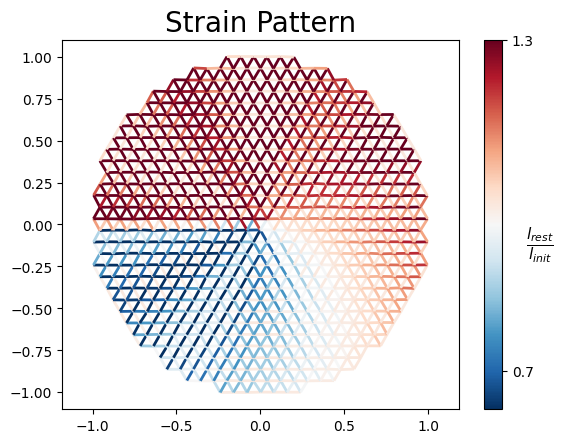

In [5]:
SpringLatticeSimulator.visualize(state="initial", color_max=0.7, color_min=1.3)

## --- Works till here --

### Perform the simulation

In [6]:
#add noise
SpringLatticeSimulator.add_noise(noise = 0.01,seed=0)
#perform simulation
SpringLatticeSimulator.RunSimulation(tol = 1e-6)

Implementing external forces
dt 0.01
save_csv 50000
dim 4.01648
tol 1e-06
PARMETIS ERROR: Poor initial vertex distribution. Processor 0 has no vertices assigned to it!
TIME step: 0
Avg movement: 0.000820851


/home/linuxbrew/.linuxbrew/opt/openfpm/openfpm_pdata/include/Decomposition/Distribution/parmetis_util.hpp:232 Error detected invalid installation of Parmetis. OpenFPM support Parmetis/Metis version with 64 bit idx_t
Stack trace deactivated, use #define PRINT_STACKTRACE to activate


$$$$ Exit OpenFPM $$$$


### Visualize the results

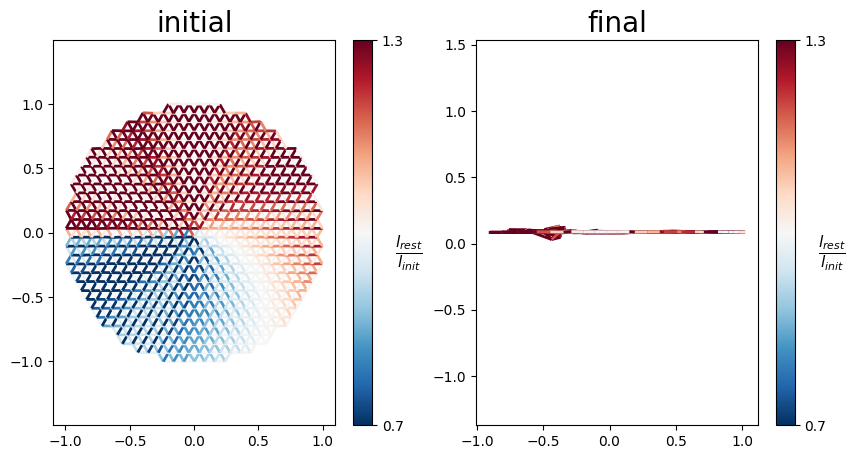

In [7]:
import matplotlib.pyplot as plt
#visualize the pattern
%matplotlib inline
fig,axs = plt.subplots(1,2,figsize=(10,5))

fig,axs[0] = SpringLatticeSimulator.visualize(ax = axs[0], fig = fig, mode = "discrete", state = "initial", x = "x", y = "y", title = "initial")
fig,axs[1] = SpringLatticeSimulator.visualize(ax = axs[1], fig = fig, mode = "discrete", state = "final", x = "x", y = "z", title = "final")

### Load spontaneous strain pattern

In [8]:
import numpy as np
#load spontaneous strain pattern
SpringLatticeSimulator.nematic_coordinates = "polar"
lambda_r = np.poly1d([0.25, 0.25, 1])
lambda_theta = np.poly1d([1])
lambda_h = np.poly1d([1])
SpringLatticeSimulator.load_strain_pattern(lambda1 = lambda_r, lambda2 = lambda_theta, lambda3 = lambda_h)

AttributeError: 'spring_lattice' object has no attribute 'load_strain_pattern'